# Performance measurements of RandomForestClassifier

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = p.read_csv('data1.csv')

In [4]:
data.head()

,Unnamed: 0,CUSTOMERID,CHECKINGSTATUS,LOANDURATION,CREDITHISTORY,LOANPURPOSE,LOANAMOUNT,EXISTINGSAVINGS,EMPLOYMENTDURATION,INSTALLMENTPERCENT,...,OWNSPROPERTY,AGE,INSTALLMENTPLANS,HOUSING,EXISTINGCREDITSCOUNT,JOB,DEPENDENTS,TELEPHONE,FOREIGNWORKER,RISK
0,0,713a336c-a255-4e2d-9d57-90b3e99e2f06,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,1,140b363f-a3fe-4828-a33f-7284dfdb3969,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,2,43b7b51d-5eda-4860-b461-ebef3d3436f4,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,3,f40eaf08-e6d1-4765-ab20-c5f7faca1635,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,4,1728910a-d3ff-4799-ac50-203a3a58a3fb,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [5]:
data.shape

(6660, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6660 entries, 0 to 6659
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                6660 non-null   int64 
 1   CUSTOMERID                6660 non-null   object
 2   CHECKINGSTATUS            6660 non-null   object
 3   LOANDURATION              6660 non-null   int64 
 4   CREDITHISTORY             6660 non-null   object
 5   LOANPURPOSE               6660 non-null   object
 6   LOANAMOUNT                6660 non-null   int64 
 7   EXISTINGSAVINGS           6660 non-null   object
 8   EMPLOYMENTDURATION        6660 non-null   object
 9   INSTALLMENTPERCENT        6660 non-null   int64 
 10  SEX                       6660 non-null   object
 11  OTHERSONLOAN              6660 non-null   object
 12  CURRENTRESIDENCEDURATION  6660 non-null   int64 
 13  OWNSPROPERTY              6660 non-null   object
 14  AGE                     

In [7]:
data.columns

Index(['Unnamed: 0', 'CUSTOMERID', 'CHECKINGSTATUS', 'LOANDURATION',
       'CREDITHISTORY', 'LOANPURPOSE', 'LOANAMOUNT', 'EXISTINGSAVINGS',
       'EMPLOYMENTDURATION', 'INSTALLMENTPERCENT', 'SEX', 'OTHERSONLOAN',
       'CURRENTRESIDENCEDURATION', 'OWNSPROPERTY', 'AGE', 'INSTALLMENTPLANS',
       'HOUSING', 'EXISTINGCREDITSCOUNT', 'JOB', 'DEPENDENTS', 'TELEPHONE',
       'FOREIGNWORKER', 'RISK'],
      dtype='object')

In [8]:
data['CHECKINGSTATUS'].unique()

array(['0_to_200', 'less_0', 'no_checking', 'greater_200'], dtype=object)

In [9]:
data['LOANDURATION'].unique()

array([31, 18, 15, 28, 32,  9, 16, 11, 35,  5, 27, 29,  4, 33, 39, 13, 34,
       23, 10, 25, 20, 26, 21,  7, 14, 64,  6, 19, 17, 38,  8, 30, 22, 37,
       12, 36, 50, 41, 24, 43, 40, 48, 46, 44, 42, 45, 53, 61, 51, 63, 47,
       54, 49, 60, 59, 56, 62, 57, 52], dtype=int64)

In [10]:
data['CREDITHISTORY'].unique()

array(['credits_paid_to_date', 'prior_payments_delayed',
       'outstanding_credit', 'all_credits_paid_back', 'no_credits'],
      dtype=object)

In [11]:
data['LOANPURPOSE'].unique()

array(['other', 'car_new', 'furniture', 'retraining', 'education',
       'vacation', 'appliances', 'car_used', 'repairs', 'radio_tv',
       'business'], dtype=object)

In [12]:
data['LOANAMOUNT'].nunique()

3354

In [13]:
data['EXISTINGSAVINGS'].unique()

array(['100_to_500', 'less_100', '500_to_1000', 'unknown', 'greater_1000'],
      dtype=object)

In [14]:
data['EMPLOYMENTDURATION'].unique()

array(['less_1', '1_to_4', 'greater_7', '4_to_7', 'unemployed'],
      dtype=object)

In [15]:
data['INSTALLMENTPERCENT'].unique()

array([3, 2, 6, 5, 4, 1], dtype=int64)

In [16]:
data['SEX'].unique()

array(['female', 'male'], dtype=object)

In [17]:
data['OTHERSONLOAN'].unique()

array(['none', 'co-applicant', 'guarantor'], dtype=object)

In [18]:
data['CURRENTRESIDENCEDURATION'].unique()

array([3, 2, 5, 4, 1, 6], dtype=int64)

In [19]:
data['OWNSPROPERTY'].unique()

array(['savings_insurance', 'real_estate', 'unknown', 'car_other'],
      dtype=object)

In [20]:
data['AGE'].unique()

array([32, 37, 28, 57, 41, 36, 22, 49, 19, 34, 40, 44, 52, 35, 26, 27, 24,
       33, 51, 38, 46, 31, 39, 29, 45, 25, 59, 55, 42, 54, 20, 50, 30, 47,
       53, 43, 48, 23, 56, 21, 60, 70, 61, 62, 58, 65, 66, 74, 63, 71, 67,
       73, 64], dtype=int64)

In [21]:
data['INSTALLMENTPLANS'].unique()

array(['none', 'stores', 'bank'], dtype=object)

In [22]:
data['HOUSING'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [23]:
data['EXISTINGCREDITSCOUNT'].unique()

array([1, 2, 3, 4], dtype=int64)

In [24]:
data['JOB'].unique()

array(['skilled', 'management_self-employed', 'unskilled', 'unemployed'],
      dtype=object)

In [25]:
data['DEPENDENTS'].unique()

array([1, 2], dtype=int64)

In [26]:
data['TELEPHONE'].unique()

array(['none', 'yes'], dtype=object)

In [27]:
data['FOREIGNWORKER'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
data['RISK'].unique()

array(['No Risk', 'Risk'], dtype=object)

In [29]:
df=data.dropna()

In [30]:
df.shape

(6660, 23)

In [31]:
df.columns

Index(['Unnamed: 0', 'CUSTOMERID', 'CHECKINGSTATUS', 'LOANDURATION',
       'CREDITHISTORY', 'LOANPURPOSE', 'LOANAMOUNT', 'EXISTINGSAVINGS',
       'EMPLOYMENTDURATION', 'INSTALLMENTPERCENT', 'SEX', 'OTHERSONLOAN',
       'CURRENTRESIDENCEDURATION', 'OWNSPROPERTY', 'AGE', 'INSTALLMENTPLANS',
       'HOUSING', 'EXISTINGCREDITSCOUNT', 'JOB', 'DEPENDENTS', 'TELEPHONE',
       'FOREIGNWORKER', 'RISK'],
      dtype='object')

In [32]:
del df['CUSTOMERID']
del df['Unnamed: 0']

In [33]:
df.columns

Index(['CHECKINGSTATUS', 'LOANDURATION', 'CREDITHISTORY', 'LOANPURPOSE',
       'LOANAMOUNT', 'EXISTINGSAVINGS', 'EMPLOYMENTDURATION',
       'INSTALLMENTPERCENT', 'SEX', 'OTHERSONLOAN', 'CURRENTRESIDENCEDURATION',
       'OWNSPROPERTY', 'AGE', 'INSTALLMENTPLANS', 'HOUSING',
       'EXISTINGCREDITSCOUNT', 'JOB', 'DEPENDENTS', 'TELEPHONE',
       'FOREIGNWORKER', 'RISK'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
label_columns= ['CHECKINGSTATUS','CREDITHISTORY',
       'LOANPURPOSE','EXISTINGSAVINGS', 'EMPLOYMENTDURATION',
 'SEX', 'OTHERSONLOAN','OWNSPROPERTY','INSTALLMENTPLANS','HOUSING','JOB','TELEPHONE',
       'FOREIGNWORKER', 'RISK']
lebel_data = LabelEncoder()
for i in label_columns:
    df[i] = lebel_data.fit_transform(df[i]).astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6660 entries, 0 to 6659
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CHECKINGSTATUS            6660 non-null   int32
 1   LOANDURATION              6660 non-null   int64
 2   CREDITHISTORY             6660 non-null   int32
 3   LOANPURPOSE               6660 non-null   int32
 4   LOANAMOUNT                6660 non-null   int64
 5   EXISTINGSAVINGS           6660 non-null   int32
 6   EMPLOYMENTDURATION        6660 non-null   int32
 7   INSTALLMENTPERCENT        6660 non-null   int64
 8   SEX                       6660 non-null   int32
 9   OTHERSONLOAN              6660 non-null   int32
 10  CURRENTRESIDENCEDURATION  6660 non-null   int64
 11  OWNSPROPERTY              6660 non-null   int32
 12  AGE                       6660 non-null   int64
 13  INSTALLMENTPLANS          6660 non-null   int32
 14  HOUSING                   6660 non-null 

In [36]:
df.head()

,CHECKINGSTATUS,LOANDURATION,CREDITHISTORY,LOANPURPOSE,LOANAMOUNT,EXISTINGSAVINGS,EMPLOYMENTDURATION,INSTALLMENTPERCENT,SEX,OTHERSONLOAN,...,OWNSPROPERTY,AGE,INSTALLMENTPLANS,HOUSING,EXISTINGCREDITSCOUNT,JOB,DEPENDENTS,TELEPHONE,FOREIGNWORKER,RISK
0,0,31,1,6,1889,0,3,3,0,2,...,2,32,1,1,1,1,1,0,1,0
1,2,18,1,2,462,3,0,2,0,2,...,2,37,2,1,2,1,1,0,1,0
2,2,15,4,5,250,3,0,2,1,2,...,1,28,1,1,2,1,1,1,0,0
3,0,28,1,9,3693,3,2,3,1,2,...,2,32,1,1,1,1,1,0,1,0
4,3,28,4,4,6235,1,2,3,1,2,...,3,57,1,1,2,1,1,0,1,1


In [37]:
df.shape

(6660, 21)

In [38]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='RISK', axis=1)
#Response variable
y = df.loc[:,'RISK']    

# '''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few Patient Status'''


In [39]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  5328
Number of test dataset:  1332
Total number of dataset:  6660


In [40]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

DT= RandomForestClassifier(max_depth=5)

DT.fit(X_train,y_train)

predictDT = DT.predict(X_test)

print("")
print('Classification report of RandomForestClassifier Results:')
print("")
print(classification_report(y_test,predictDT))


print("")
print('accuracy_score of RandomForestClassifier Results:')
print("")
print(accuracy_score(y_test,predictDT)*100)


print("")
cm1=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of RandomForestClassifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(DT, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of RandomForestClassifier is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of RandomForestClassifier Results:

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       666
           1       0.73      0.76      0.75       666

    accuracy                           0.74      1332
   macro avg       0.74      0.74      0.74      1332
weighted avg       0.74      0.74      0.74      1332


accuracy_score of RandomForestClassifier Results:

74.24924924924925

Confusion Matrix result of RandomForestClassifier is:
 [[482 184]
 [159 507]]

Sensitivity :  0.7237237237237237

Specificity :  0.7612612612612613

Cross validation test results of accuracy:
[0.74024024 0.74774775 0.75900901 0.753003   0.75900901]

Accuracy result of RandomForestClassifier is: 75.18018018018017


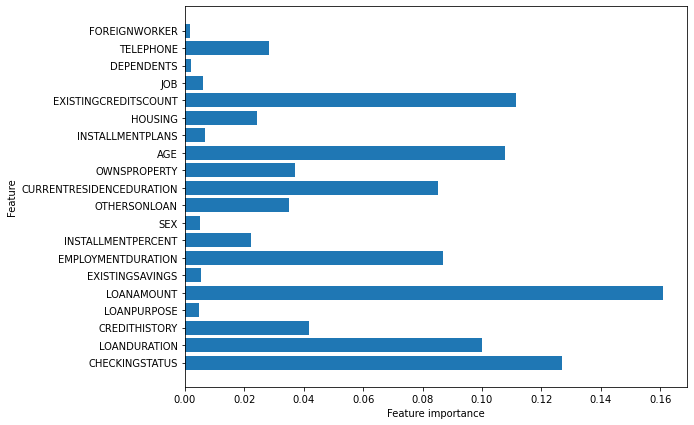

In [42]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), DT.feature_importances_, align='center')
plt.yticks(n.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [43]:
import joblib
joblib.dump(DT,'rf.pkl')

['rf.pkl']